In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# download all rows from SQL
install = pd.read_csv('/Users/sili/Desktop/install')
login = pd.read_csv('/Users/sili/Desktop/login')

In [3]:
install.head()

,uid,platform,event_timestamp,dt,country,network,app_version
0,54211,android,1566030603,2019-08-17,Mordor,Paid Network 4,0.12.0
1,21823,android,1566012628,2019-08-17,Tatooine,Paid Network 4,0.12.0
2,164821,android,1567088297,2019-08-29,Gargantua,Paid Network 4,0.12.0
3,110607,android,1566013000,2019-08-17,Tatooine,Paid Network 4,0.12.0
4,196163,android,1565816382,2019-08-14,Gargantua,Paid Network 4,0.12.0


In [4]:
len(set(install.uid))

228635

In [5]:
len(set(install.country))

6

In [6]:
min(install.dt), max(install.dt)

('2019-08-01', '2019-09-15')

In [7]:
login.head()

,uid,platform,event_timestamp,dt,s_index,app_version
0,105691,ios,1567100569,2019-08-29,2,0.12.0
1,105691,ios,1567101187,2019-08-29,3,0.12.0
2,105691,ios,1567120804,2019-08-29,4,0.12.0
3,105691,ios,1567123283,2019-08-30,5,0.12.0
4,105691,ios,1567129997,2019-08-30,6,0.12.0


In [8]:
len(set(login.uid))

228269

In [9]:
(len(set(install.uid)) - len(set(login.uid)))/len(set(install.uid))

0.0016008047761716273

very few users have downloaded the game and only opened the app once 

In [10]:
min(login.dt), max(login.dt)

('2019-07-31', '2019-09-15')

there is a mismatch on the earlist date between login and install dataset. lets have a look at who login on 31st

In [11]:
login[login.dt=='2019-07-31']

,uid,platform,event_timestamp,dt,s_index,app_version
500150,141765,android,1564582975,2019-07-31,1,0.12.0
500151,141765,android,1564592741,2019-07-31,2,0.12.0
500152,141765,android,1564596519,2019-07-31,2,0.12.0
1099250,166817,android,1564608358,2019-07-31,1,0.12.0
1613864,97675,android,1564566526,2019-07-31,1,0.12.0
1613865,97675,android,1564567262,2019-07-31,2,0.12.0
1613866,97675,android,1564567934,2019-07-31,3,0.12.0
1613867,97675,android,1564570281,2019-07-31,4,0.12.0
1613868,97675,android,1564571193,2019-07-31,4,0.12.0
1613869,97675,android,1564575513,2019-07-31,5,0.12.0


In [12]:
install[(install.uid == 141765) | (install.uid == 166817) | (install.uid == 97675) | (install.uid == 215289) | (install.uid == 19513)]

,uid,platform,event_timestamp,dt,country,network,app_version
32754,166817,android,1565646027,2019-08-12,Gargantua,Paid Network 1,0.12.0
48087,141765,android,1564858620,2019-08-03,Gargantua,Paid Network 1,0.12.0
97045,19513,android,1564947189,2019-08-04,Gargantua,Paid Network 1,0.12.0
148439,215289,android,1566981413,2019-08-28,Gotham,Paid Network 1,0.12.0
229333,97675,android,1566555569,2019-08-23,Mordor,Paid Network 1,0.12.0


This is strange as login date is 2019-07-31 but these users didn't install the game until Aug. Need to flag this out

In [13]:
login[login.dt=='2019-07-31'].uid.unique()

array([141765, 166817,  97675, 215289,  19513])

In [14]:
len(login), len(install)

(4153398, 229730)

In [15]:
# remove these users from login and install dataset
login = login[~login.uid.isin(login[login.dt=='2019-07-31'].uid.unique())]
install = install[~install.uid.isin(install[install.dt=='2019-07-31'].uid.unique())]

In [16]:
len(login), len(install)

(4152816, 229730)

# Overall Growth

# Install

In [17]:
install_df = install.groupby(['dt']).nunique()['uid'].reset_index()

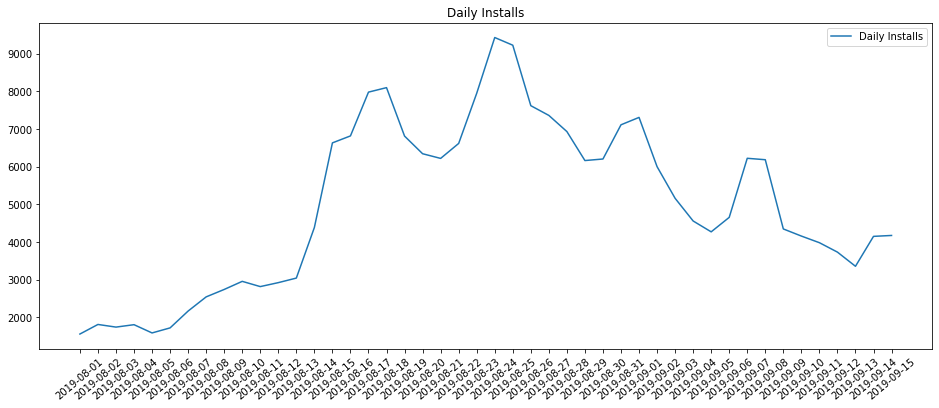

In [18]:
plt.subplots(figsize=(16,6))
plt.plot(install_df['dt'], install_df['uid'])
plt.legend(['Daily Installs'])
plt.title('Daily Installs')
plt.xticks(rotation=40);

this is volatile due to high weekend downloads. Smooth it out by calculating 7-day average

In [19]:
# calculate 7 day average uid count

install_df['7d_average_uid_count'] = install_df.uid.rolling(window=7).mean()

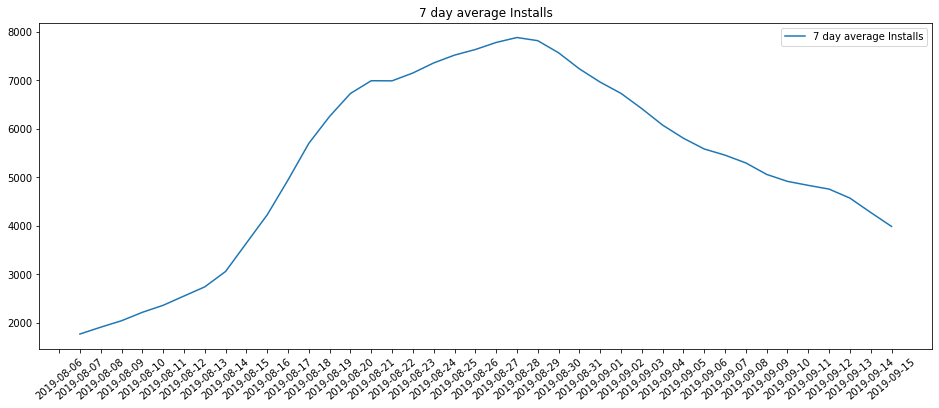

In [20]:
plt.subplots(figsize=(16,6))
plt.plot(install_df['dt'], install_df['7d_average_uid_count'])
plt.legend(['7 day average Installs'])
plt.title('7 day average Installs')
plt.xticks(rotation=40);

# Engagement

## Daily & Monthly Active User

In [21]:
login.dt = pd.to_datetime(login.dt)

In [22]:
#write our function that will create an active user table with a single row for each date
def setup_active_user_df(df):
    active_user_df = pd.DataFrame({"dt": pd.date_range(login['dt'].min(), login['dt'].max())})
    return active_user_df

In [23]:
#performs the most work, looping through event_df for each date in our active_users_df
def active_users_in_period(active_user_df, event_df, col_name, period):
    active_user_df[col_name] = 0   # Creates the empty column to be filled in
    for i in range(len(active_user_df)):
        origin_date = active_user_df['dt'][i]
        offset_date = origin_date - pd.offsets.Day(int(period))
        # filter the original dataframe and count unique visitors
        count = len(event_df.loc[
                                (event_df['dt'] <= origin_date) & 
                                (event_df['dt'] > offset_date),
                                'uid'].unique())
        active_user_df.loc[i, col_name] = count
    return active_user_df

In [24]:
active_user_df = setup_active_user_df(login)
active_user_df = active_users_in_period(active_user_df, login, 'DAU', 1)
active_user_df = active_users_in_period(active_user_df, login, 'MAU', 30)

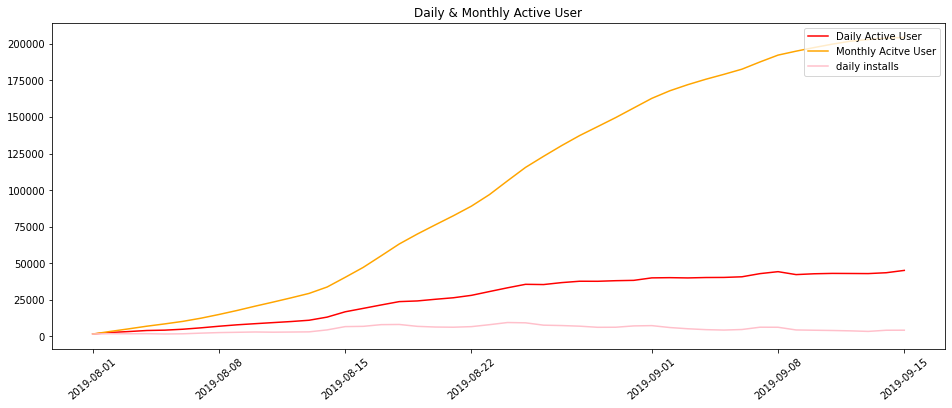

In [25]:
plt.subplots(figsize=(16,6))
plt.plot(active_user_df['dt'], active_user_df['DAU'], 'red', active_user_df['dt'], active_user_df['MAU'], 'orange', active_user_df['dt'], install_df['uid'], 'pink')
plt.legend(['Daily Active User', 'Monthly Acitve User', 'daily installs'], loc='upper right')
plt.title('Daily & Monthly Active User')
plt.xticks(rotation=40);

## Stickiness

In [26]:
active_user_df['stickness'] = active_user_df['DAU'] / active_user_df['MAU']

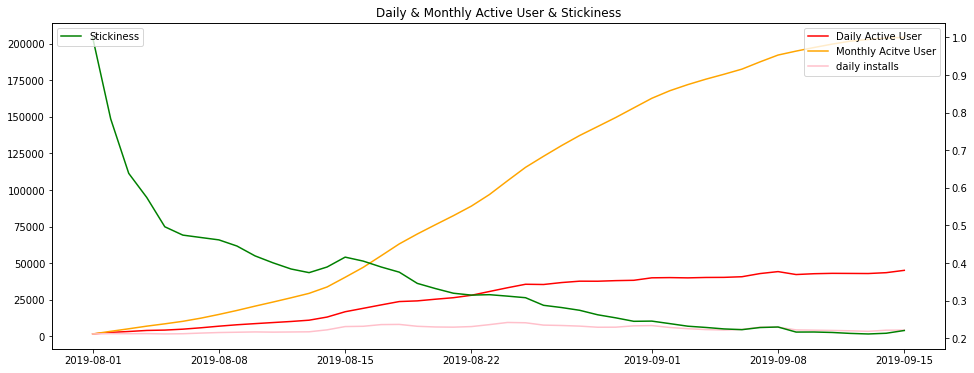

In [27]:
fig, ax = plt.subplots(figsize=(16,6))
ax2 = ax.twinx()
ax.plot(active_user_df['dt'], active_user_df['DAU'], 'red', active_user_df['dt'], active_user_df['MAU'], 'orange', active_user_df['dt'], install_df['uid'], 'pink')
ax2.plot(active_user_df['dt'], active_user_df['stickness'], 'green')
ax.legend(['Daily Active User', 'Monthly Acitve User', 'daily installs'], loc='upper right')
ax2.legend(['Stickiness'], loc='upper left')
plt.title('Daily & Monthly Active User & Stickiness')
plt.xticks(rotation=40);

## Retention Rate

In [28]:
install.shape

(229730, 7)

In [29]:
# some users have downloaded multiple times. keep first download and remove the following ones
install = install.sort_values(by=['dt', 'uid']).drop_duplicates(subset='uid', keep='first')

In [30]:
install.shape

(228635, 7)

In [31]:
# merge login and install dataset
retention = pd.merge(install[['uid', 'dt']], login[['uid', 'dt']], left_on='uid', right_on='uid', how='inner')
retention.rename(columns={'dt_x':'install_dt', 'dt_y':'login_dt'}, inplace=True)
retention.head()

,uid,install_dt,login_dt
0,34,2019-08-01,2019-08-01
1,34,2019-08-01,2019-08-01
2,34,2019-08-01,2019-08-01
3,34,2019-08-01,2019-08-01
4,34,2019-08-01,2019-08-02


In [78]:
# create a seniority column
retention.install_dt = pd.to_datetime(retention.install_dt)
retention.login_dt = pd.to_datetime(retention.login_dt)
retention['seniority'] = (retention.login_dt - retention.install_dt).dt.days+1
retention.head()

,uid,install_dt,login_dt,seniority
0,34,2019-08-01,2019-08-01,1
1,34,2019-08-01,2019-08-01,1
2,34,2019-08-01,2019-08-01,1
3,34,2019-08-01,2019-08-01,1
4,34,2019-08-01,2019-08-02,2


In [79]:
# filter out some weird rows where login date is before install date

retention = retention[retention.seniority>=0]

In [80]:
#create a count table where unique number of installs are counted by date

group_count = retention.groupby(['install_dt', 'seniority'])
retention_df = group_count['uid'].nunique().reset_index().rename(columns={'uid':'uid_counts'})
retention_df.head()

,install_dt,seniority,uid_counts
0,2019-08-01,1,1559
1,2019-08-01,2,829
2,2019-08-01,3,639
3,2019-08-01,4,582
4,2019-08-01,5,523


In [81]:
# create a pivot table
cohort_counts = retention_df.pivot(index='install_dt', columns='seniority', values='uid_counts')
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
install_dt,,,,,,,,,,,,,,,,,,,,,
2019-08-01,1559.0,829.0,639.0,582.0,523.0,516.0,509.0,473.0,464.0,418.0,...,230.0,220.0,226.0,209.0,234.0,233.0,228.0,214.0,227.0,213.0
2019-08-02,1812.0,886.0,710.0,632.0,587.0,559.0,524.0,485.0,455.0,459.0,...,266.0,274.0,259.0,251.0,250.0,247.0,255.0,251.0,259.0,NaN
2019-08-03,1736.0,875.0,645.0,545.0,490.0,476.0,465.0,439.0,402.0,399.0,...,214.0,204.0,205.0,195.0,199.0,197.0,189.0,187.0,NaN,NaN
2019-08-04,1802.0,833.0,667.0,590.0,526.0,504.0,469.0,453.0,431.0,428.0,...,234.0,220.0,228.0,225.0,219.0,225.0,229.0,NaN,NaN,NaN
2019-08-05,1584.0,809.0,641.0,551.0,483.0,450.0,438.0,411.0,415.0,384.0,...,209.0,213.0,207.0,214.0,190.0,190.0,NaN,NaN,NaN,NaN
2019-08-06,1720.0,840.0,670.0,607.0,498.0,481.0,468.0,457.0,441.0,432.0,...,245.0,227.0,239.0,220.0,225.0,NaN,NaN,NaN,NaN,NaN
2019-08-07,2161.0,1125.0,860.0,738.0,701.0,690.0,649.0,612.0,587.0,560.0,...,317.0,299.0,294.0,283.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-08,2539.0,1259.0,949.0,873.0,814.0,760.0,750.0,702.0,670.0,624.0,...,403.0,382.0,390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-09,2730.0,1272.0,996.0,844.0,748.0,695.0,666.0,632.0,565.0,548.0,...,340.0,352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# get the first column and then calculate retention

base = cohort_counts[1]
retention_rate = cohort_counts.divide(base, axis=0).round(3)

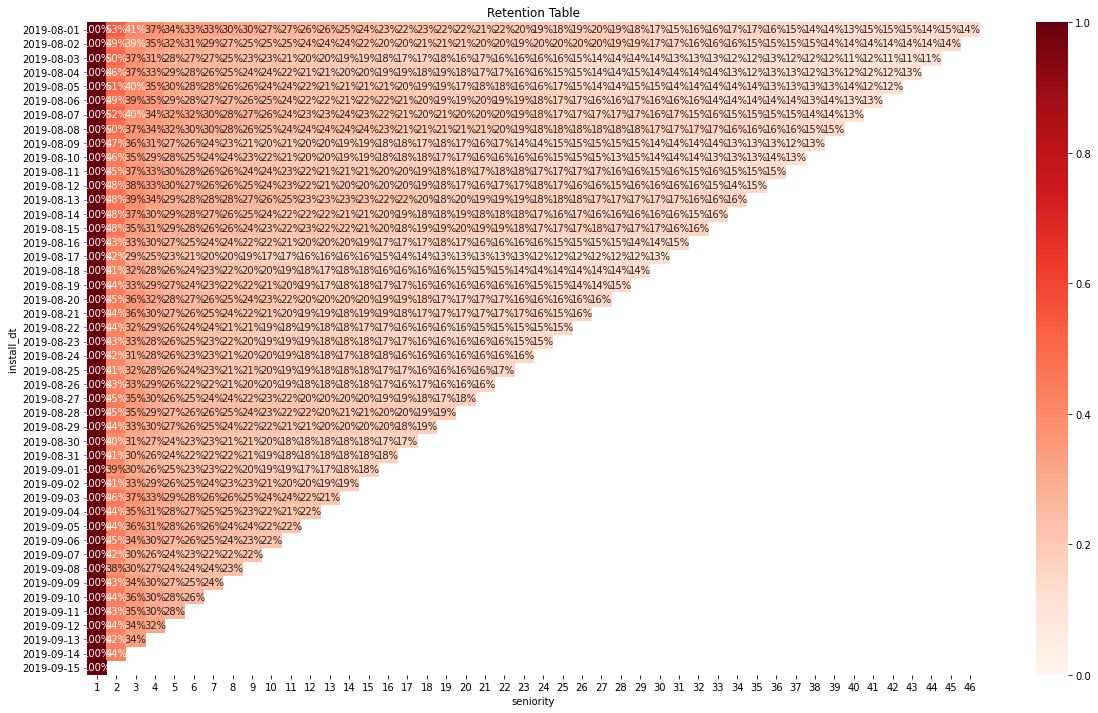

In [89]:
# Retention Rate heatmap
plt.figure(figsize=(20,12))
plt.title('Retention Table')
ax = sns.heatmap(data=retention_rate, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_rate.index.strftime('%Y-%m-%d'))
fig=ax.get_figure()

plt.show()

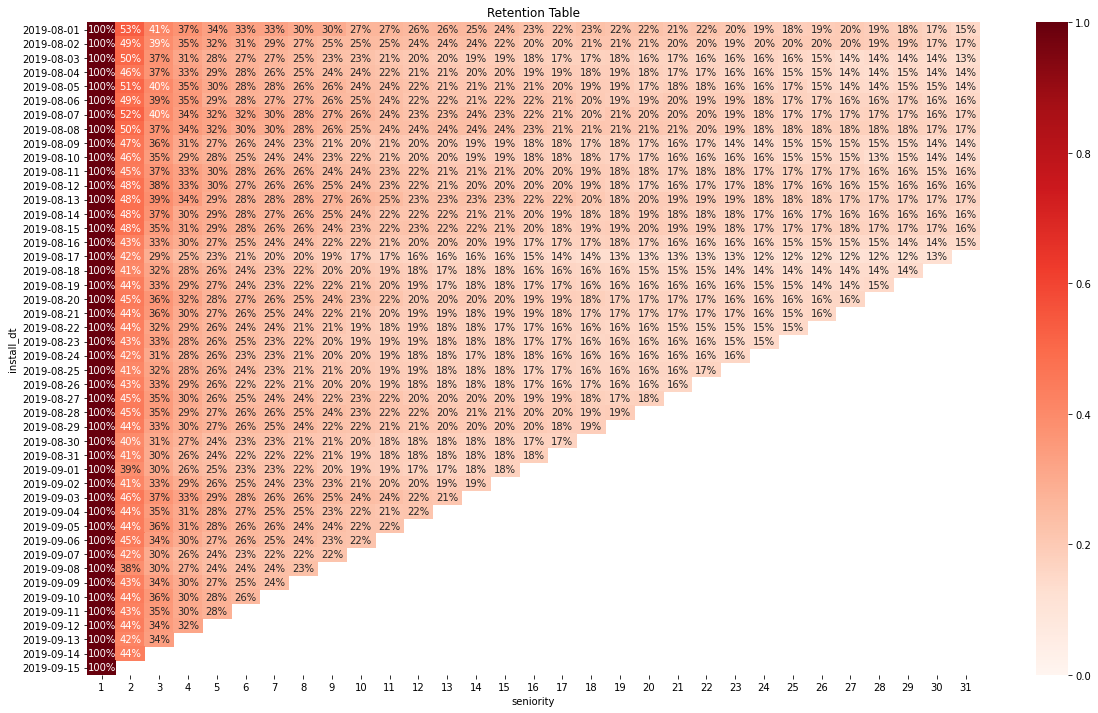

In [90]:
# Retention Rate heatmap up to the 30th day
plt.figure(figsize=(20,12))
plt.title('Retention Table')
ax = sns.heatmap(data=retention_rate.iloc[:, :31], annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_rate.index.strftime('%Y-%m-%d'))
fig=ax.get_figure()

plt.show()

In [108]:
# calculate retention rate for specific days

print('1-day retention {:.2%}\n3-day retention {:.2%}\n7-day retention {:.2%}\n30-day retention {:.2%}\n'.format(
    retention_rate[2].mean(),retention_rate[4].mean(), retention_rate[8].mean(), retention_rate[31].mean()))

1-day retention 44.81%
3-day retention 30.45%
7-day retention 24.21%
30-day retention 15.37%



# User Experience

## Starts, Leaves, Restarts and Success

In [38]:
# game_counts dataset comes from above sql
# start = leave + lose + restart + success

game_counts = pd.read_csv('/Users/sili/Desktop/game_cunts.csv')
game_counts.head()

,dt,type,counts
0,2019-08-01,starts,16094
1,2019-08-02,starts,21811
2,2019-08-03,starts,23631
3,2019-08-04,starts,27286
4,2019-08-05,starts,27363


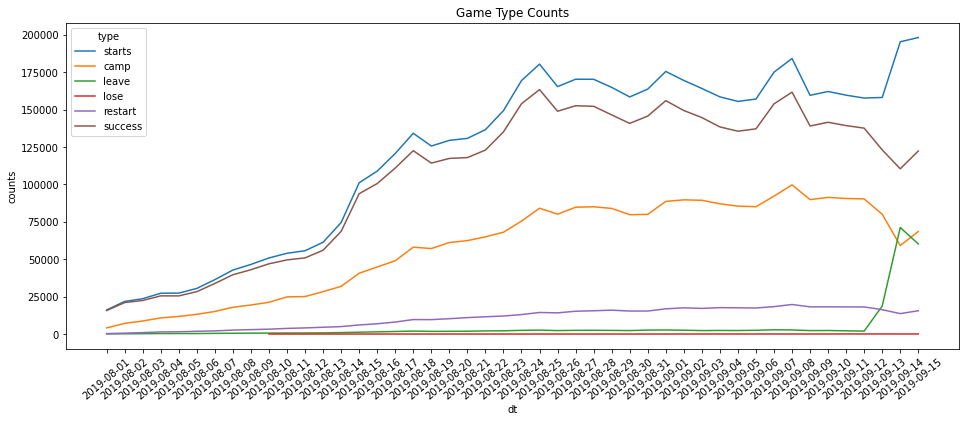

In [39]:
plt.figure(figsize=(16,6))
sns.lineplot(data=game_counts, x="dt", y="counts", hue="type")
plt.title('Game Type Counts')
plt.xticks(rotation=40);

Leave looks off towards the end of the soft launch

In [40]:
# Take a closer look at the leave till the end
leave = pd.read_csv('/Users/sili/Desktop/leave.csv')
leave.head()

,dt,level,counts
0,2019-09-14,Level_Event_Autumn_2019,69243
1,2019-09-15,Level_Event_Autumn_2019,58319
2,2019-09-13,Level_Event_Autumn_2019,16875
3,2019-09-12,Level_Grove_7_Challenge1,225
4,2019-09-10,Level_Grove_7_Challenge1,221


In [41]:
# zoom in levels where leaves are above 50

leave_50 = leave[leave['counts']>=50].sort_values(by='dt')

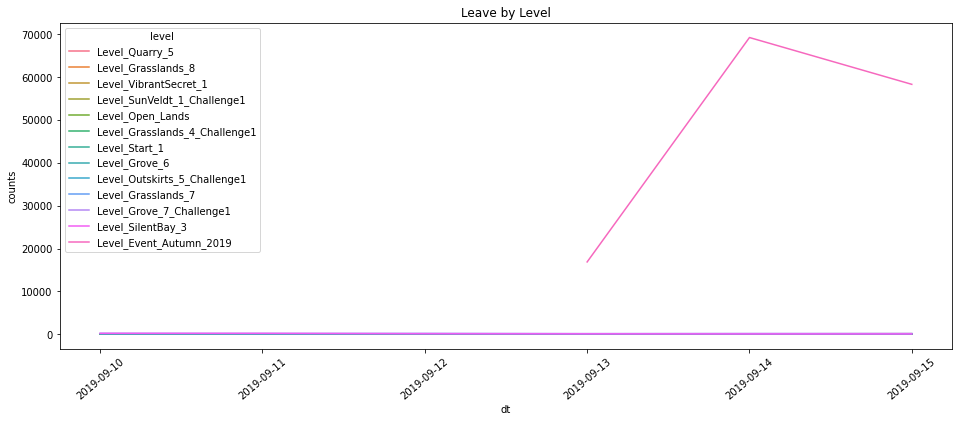

In [42]:
plt.figure(figsize=(16,6))
sns.lineplot(data=leave_50, x="dt", y="counts", hue="level")
plt.title('Leave by Level')
plt.xticks(rotation=40);

## Camp vs New Game

In [43]:
start_game = pd.read_csv('/Users/sili/Desktop/start_game.csv')
start_game.head()

,dt,type,counts
0,2019-07-31,camp,27
1,2019-07-31,newg,71
2,2019-08-01,camp,6022
3,2019-08-01,newg,16302
4,2019-08-02,camp,10884


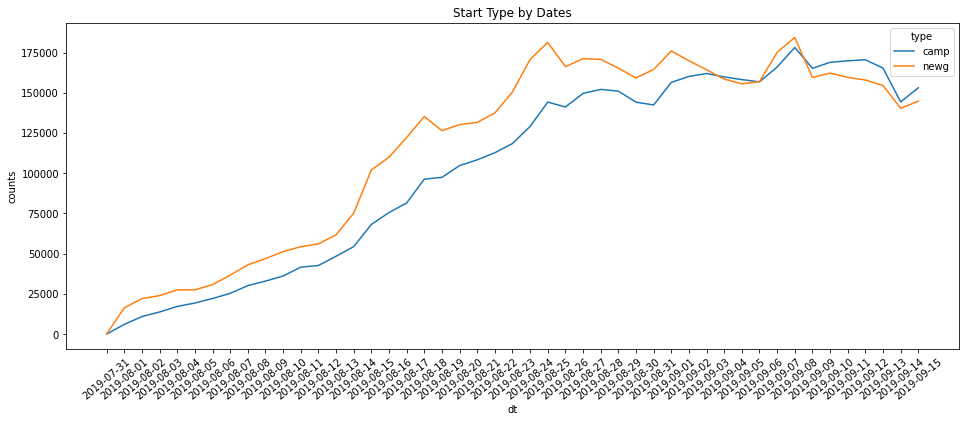

In [44]:
plt.figure(figsize=(16,6))
sns.lineplot(data=start_game, x="dt", y="counts", hue="type")
plt.title('Start Type by Dates')
plt.xticks(rotation=40);

## Currency Flow

In [45]:
currency = pd.read_csv('/Users/sili/Desktop/currency.csv')
currency.head()

,dt,gem,gold,stone,chalice
0,2019-08-01,134614,45985,15506,2865
1,2019-08-02,220833,92746,27653,5052
2,2019-08-03,234748,121029,32946,6061
3,2019-08-04,258523,151329,42430,7103
4,2019-08-05,378894,167350,47787,6985


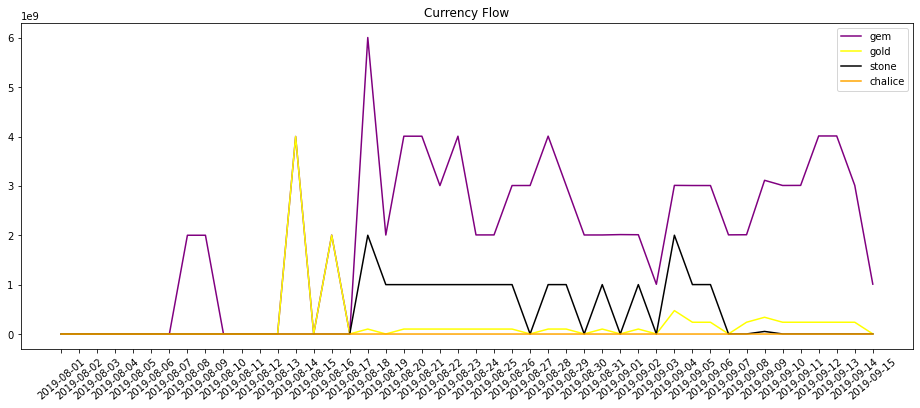

In [91]:
plt.subplots(figsize=(16,6))
plt.plot(currency['dt'], currency['gem'], 'purple', currency['dt'], currency['gold'], 'yellow', 
         currency['dt'], currency['stone'], 'black', currency['dt'], currency['chalice'], 'orange')
plt.legend(['gem', 'gold', 'stone', 'chalice'], loc='upper right')
plt.title('Currency Flow')
plt.xticks(rotation=40);

some of the spikes don't make much sense. Let's zoom in

In [47]:
currency_zoomin = pd.read_csv('/Users/sili/Desktop/currency_zoomin.csv')
currency_zoomin.head(30)

,dt,uid,gem_amount,gold_amount,stone_amount,chalice_amount,rn
0,2019-08-08,96371,1999987208,400,87,3,1
1,2019-08-09,96371,1999986366,400,99,7,1
2,2019-08-14,86673,1999979816,1999995548,2275,9,1
3,2019-08-14,96371,1999979345,1999995548,2275,7,1
4,2019-08-16,86673,1999977105,1999995548,2275,7,1
5,2019-08-18,37702,999999929,99999999,999999999,5,1
6,2019-09-11,205969,999999898,111,30,2,1
7,2019-08-23,24015,999999684,59,22,1,1
8,2019-08-18,6063,999999433,76,30,7,1
9,2019-08-18,32938,999998864,1026,30,7,1


my guess those users with crazy amount of gems etc are testers so I will remove them

In [48]:
currency_zoomin_after_removed = currency_zoomin[(currency_zoomin['gem_amount']<=2000000) & 
                                                (currency_zoomin['gold_amount']<=2000000) & 
                                                (currency_zoomin['stone_amount']<=2000000) & 
                                                (currency_zoomin['chalice_amount']<=2000000)]

In [49]:
currency_df = currency_zoomin_after_removed.groupby('dt').sum().drop('rn', axis=1).reset_index()

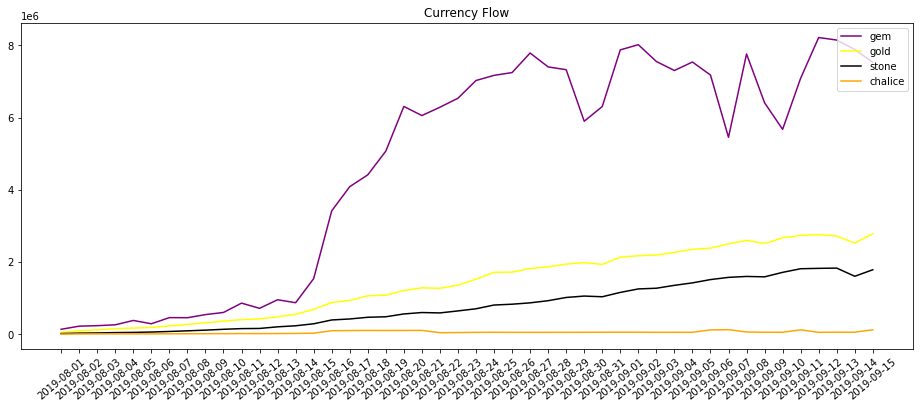

In [92]:
plt.subplots(figsize=(16,6))
plt.plot(currency_df['dt'], currency_df['gem_amount'], 'purple', currency_df['dt'], currency_df['gold_amount'], 'yellow', 
         currency_df['dt'], currency_df['stone_amount'], 'black', currency_df['dt'], currency_df['chalice_amount'], 'orange')
plt.legend(['gem', 'gold', 'stone', 'chalice'], loc='upper right')
plt.title('Currency Flow')
plt.xticks(rotation=40);

# Monetization

## Conversion

In [51]:
# download all rows from SQL

revenue = pd.read_csv('/Users/sili/Desktop/revenue')
revenue.head()

,uid,platform,event_timestamp,dt,s_index,s_time,usd_revenue,app_version
0,217099,android,1564687963,2019-08-01,1,2641,0.913670,0.12.0
1,217099,android,1564709921,2019-08-02,3,859,1.661967,0.12.0
2,217099,android,1564876556,2019-08-03,9,558,1.661967,0.12.0
3,132679,ios,1565419173,2019-08-10,3,1289,1.084178,0.12.0
4,34214,android,1565803121,2019-08-14,1,1371,0.906975,0.12.0


In [52]:
# get the first convert date 

revenue_first = revenue.sort_values(by=['dt', 'uid']).drop_duplicates(subset='uid', keep='first')

In [53]:
# created a column for paid users

revenue_first['converted'] = 1

In [54]:
# merge into install dataset
conversion = pd.merge(install[['uid', 'dt']], revenue_first[['uid', 'dt', 'converted']], 
            left_on='uid', right_on='uid', how='left').rename(columns={'dt_x':'install_dt', 'dt_y':'convert_dt'})
conversion.converted.fillna(0, inplace=True)

In [55]:
conversion.head()

,uid,install_dt,convert_dt,converted
0,34,2019-08-01,NaN,0.0
1,96,2019-08-01,2019-09-07,1.0
2,330,2019-08-01,NaN,0.0
3,491,2019-08-01,NaN,0.0
4,497,2019-08-01,NaN,0.0


In [56]:
# calculate conversion rate

conversion.converted.mean()

0.082008441402235

## Time to purchase - TTP

In [57]:
# calculate Time to Purchase for each user

conversion.install_dt = pd.to_datetime(conversion.install_dt)
conversion.convert_dt = pd.to_datetime(conversion.convert_dt)
conversion['days_to_convert'] = conversion.convert_dt - conversion.install_dt

In [58]:
conversion.head()

,uid,install_dt,convert_dt,converted,days_to_convert
0,34,2019-08-01,NaT,0.0,NaT
1,96,2019-08-01,2019-09-07,1.0,37 days
2,330,2019-08-01,NaT,0.0,NaT
3,491,2019-08-01,NaT,0.0,NaT
4,497,2019-08-01,NaT,0.0,NaT


In [59]:
# calculate average for paid users

conversion.days_to_convert.mean()

Timedelta('3 days 11:19:26.976000')

## Average Revenue Per Install - RPI

In [60]:
revenue.usd_revenue.sum() / install.uid.nunique()

0.6473387637054714

## Average Cost Per Install - CPI

In [61]:
total_acquisition_cost=111683.81

In [62]:
total_acquisition_cost / install.uid.nunique()

0.4884808100247119